In [1]:
from pathlib import Path
import json
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from  matplotlib.colors import LinearSegmentedColormap
gyr_cmap=LinearSegmentedColormap.from_list('rg',["g", "y", "r"], N=256) 

In [3]:
plt.rcParams.update({'font.size': 14})

In [4]:
input_dir = Path("../output_sweep")

In [5]:
with open(input_dir / "config.json") as f:
    pprint(json.load(f))

{'component_sweep': [1, 2, 4, 8, 12, 16, 20, 24, 28, 32],
 'core_quantile': 0.95,
 'debug': False,
 'detector': 'odd',
 'digi_smearing': 0.01,
 'disable_fatras_interactions': False,
 'erroronly': True,
 'events': 3,
 'fatras': True,
 'filter_outliers': False,
 'jobs': 3,
 'no_kalman': True,
 'no_states': True,
 'output': 'output_sweep',
 'particles': 1000,
 'pick': -1,
 'pmax': 20,
 'pmin': 0.5,
 'seeding': 'smeared',
 'surfaces': 10,
 'verbose': False,
 'weight_cutoff_sweep': [1e-08, 1e-06, 0.0001]}


In [6]:
sweep_result = pd.read_csv(input_dir / "result.csv")
sweep_result.columns

Index(['components', 'weight_cutoff', 'timing', 'n_tracks', 'n_outliers',
       'core_quantile', 'res_eLOC0_mean', 'res_eLOC0_mean_err',
       'res_eLOC0_rms', 'res_eLOC0_rms_err', 'pull_eLOC0_mean',
       'pull_eLOC0_mean_err', 'pull_eLOC0_std', 'pull_eLOC0_std_err',
       'res_eLOC1_mean', 'res_eLOC1_mean_err', 'res_eLOC1_rms',
       'res_eLOC1_rms_err', 'pull_eLOC1_mean', 'pull_eLOC1_mean_err',
       'pull_eLOC1_std', 'pull_eLOC1_std_err', 'res_ePHI_mean',
       'res_ePHI_mean_err', 'res_ePHI_rms', 'res_ePHI_rms_err',
       'res_eTHETA_mean', 'res_eTHETA_mean_err', 'res_eTHETA_rms',
       'res_eTHETA_rms_err', 'pull_eTHETA_mean', 'pull_eTHETA_mean_err',
       'pull_eTHETA_std', 'pull_eTHETA_std_err', 'res_eQOP_mean',
       'res_eQOP_mean_err', 'res_eQOP_rms', 'res_eQOP_rms_err',
       'pull_eQOP_mean', 'pull_eQOP_mean_err', 'pull_eQOP_std',
       'pull_eQOP_std_err', 'res_eP_mean', 'res_eP_mean_err', 'res_eP_rms',
       'res_eP_rms_err', 'res_ePNORM_mean', 'res_ePNORM_

In [7]:
sweep_result["timing_ms"] = 1e3 * sweep_result["timing"]
sweep_result["outlier_ratio"] = sweep_result["n_outliers"] / sweep_result["n_tracks"]

In [8]:
sweep_result = sweep_result[ sweep_result["weight_cutoff"] < 0.01 ]

In [9]:
sweep_result[["n_tracks", "n_outliers", "outlier_ratio", "timing_ms","components","weight_cutoff", "res_eQOP_mean", "res_eQOP_rms", "res_eQOP_mean_core", "res_eQOP_rms_core"]]

,n_tracks,n_outliers,outlier_ratio,timing_ms,components,weight_cutoff,res_eQOP_mean,res_eQOP_rms,res_eQOP_mean_core,res_eQOP_rms_core
0,2982,306,0.102616,22100.0,28,1.000000e-06,-0.012104,0.127770,-0.002528,0.015938
1,2974,418,0.140551,759.6,2,1.000000e-04,-0.023710,0.289555,-0.000984,0.020250
2,2964,357,0.120445,1785.0,4,1.000000e-08,-0.021182,0.295696,-0.002422,0.018790
3,2982,316,0.105969,35460.0,28,1.000000e-08,-0.011406,0.124100,-0.002595,0.016665
4,2979,425,0.142665,914.9,2,1.000000e-08,-0.021441,0.268221,-0.000878,0.020226
5,2984,314,0.105228,12040.0,16,1.000000e-06,-0.012120,0.135113,-0.002684,0.016508
6,2974,341,0.114660,2846.0,4,1.000000e-04,-0.014704,0.138816,-0.002539,0.018763
7,2984,303,0.101542,11700.0,20,1.000000e-04,-0.009610,0.093648,-0.002601,0.016493
8,2980,311,0.104362,6424.0,12,1.000000e-04,-0.012225,0.099173,-0.003059,0.016775
9,2983,307,0.102917,22650.0,24,1.000000e-06,-0.012013,0.137013,-0.002616,0.016107


In [10]:
def plot_for_key(ax, key, formatter, score_fn):
    scores = score_fn(sweep_result[key])
    
    edge_widths = np.zeros(len(scores))
    edge_widths[np.argmin(scores)] = 5.
    
    unique_components = np.unique(sweep_result["components"])
    unique_cutoffs = np.unique(sweep_result["weight_cutoff"])
    
    x_map = dict(zip(unique_components, np.arange(len(unique_components))))
    y_map = dict(zip(unique_cutoffs, np.arange(len(unique_cutoffs))))
    
    ax.scatter([ x_map[c] for c in sweep_result["components"] ],
               [ y_map[w] for w in sweep_result["weight_cutoff"] ],
               s=3000, c=scores, cmap=gyr_cmap, linewidths=edge_widths, edgecolors='black')
    
    keys = ["components","weight_cutoff",key]
    if key + "_err" in sweep_result:
        keys.append(key + "_err")
    
    for row in sweep_result[keys].to_numpy():
        text = formatter(row[2])
        if len(row) == 4:
            text += "\n±" + formatter(row[3])
        ax.text(x_map[row[0]], y_map[row[1]], text, fontdict={"size": 12}, horizontalalignment='center', verticalalignment='center')
        
    ax.set_xlabel("components")
    ax.set_ylabel("weight cutoff")
    
    ax.set_xticks(np.arange(len(unique_components)))
    ax.set_xticklabels([ str(c) for c in unique_components ])
    
    ax.set_yticks(np.arange(len(unique_cutoffs)))
    ax.set_yticklabels([ "{}".format(wc) for wc in unique_cutoffs ])
    
    enlarge = 0.25
    ax.set_ylim(ax.get_ylim()[0]-enlarge, ax.get_ylim()[1]+enlarge)
    
    ax.set_title(key, fontweight="bold", fontdict={"size": 16})

In [11]:
def plot_key_selection(axes, key_selection):
    for ax, key in zip(axes.flatten(), key_selection):
        if key == "timing_ms":
            formatter = "{:.0f}".format
        elif key == "outlier_ratio":
            formatter = "{:.2%}".format
        else:
            formatter = "{:.3f}".format

        if "pull_eQOP_std" in key:
            score_fn = lambda x: abs(1.0 - x)
        else:
            score_fn = lambda x: abs(x)

        plot_for_key(ax, key, formatter,  score_fn)

    return axes

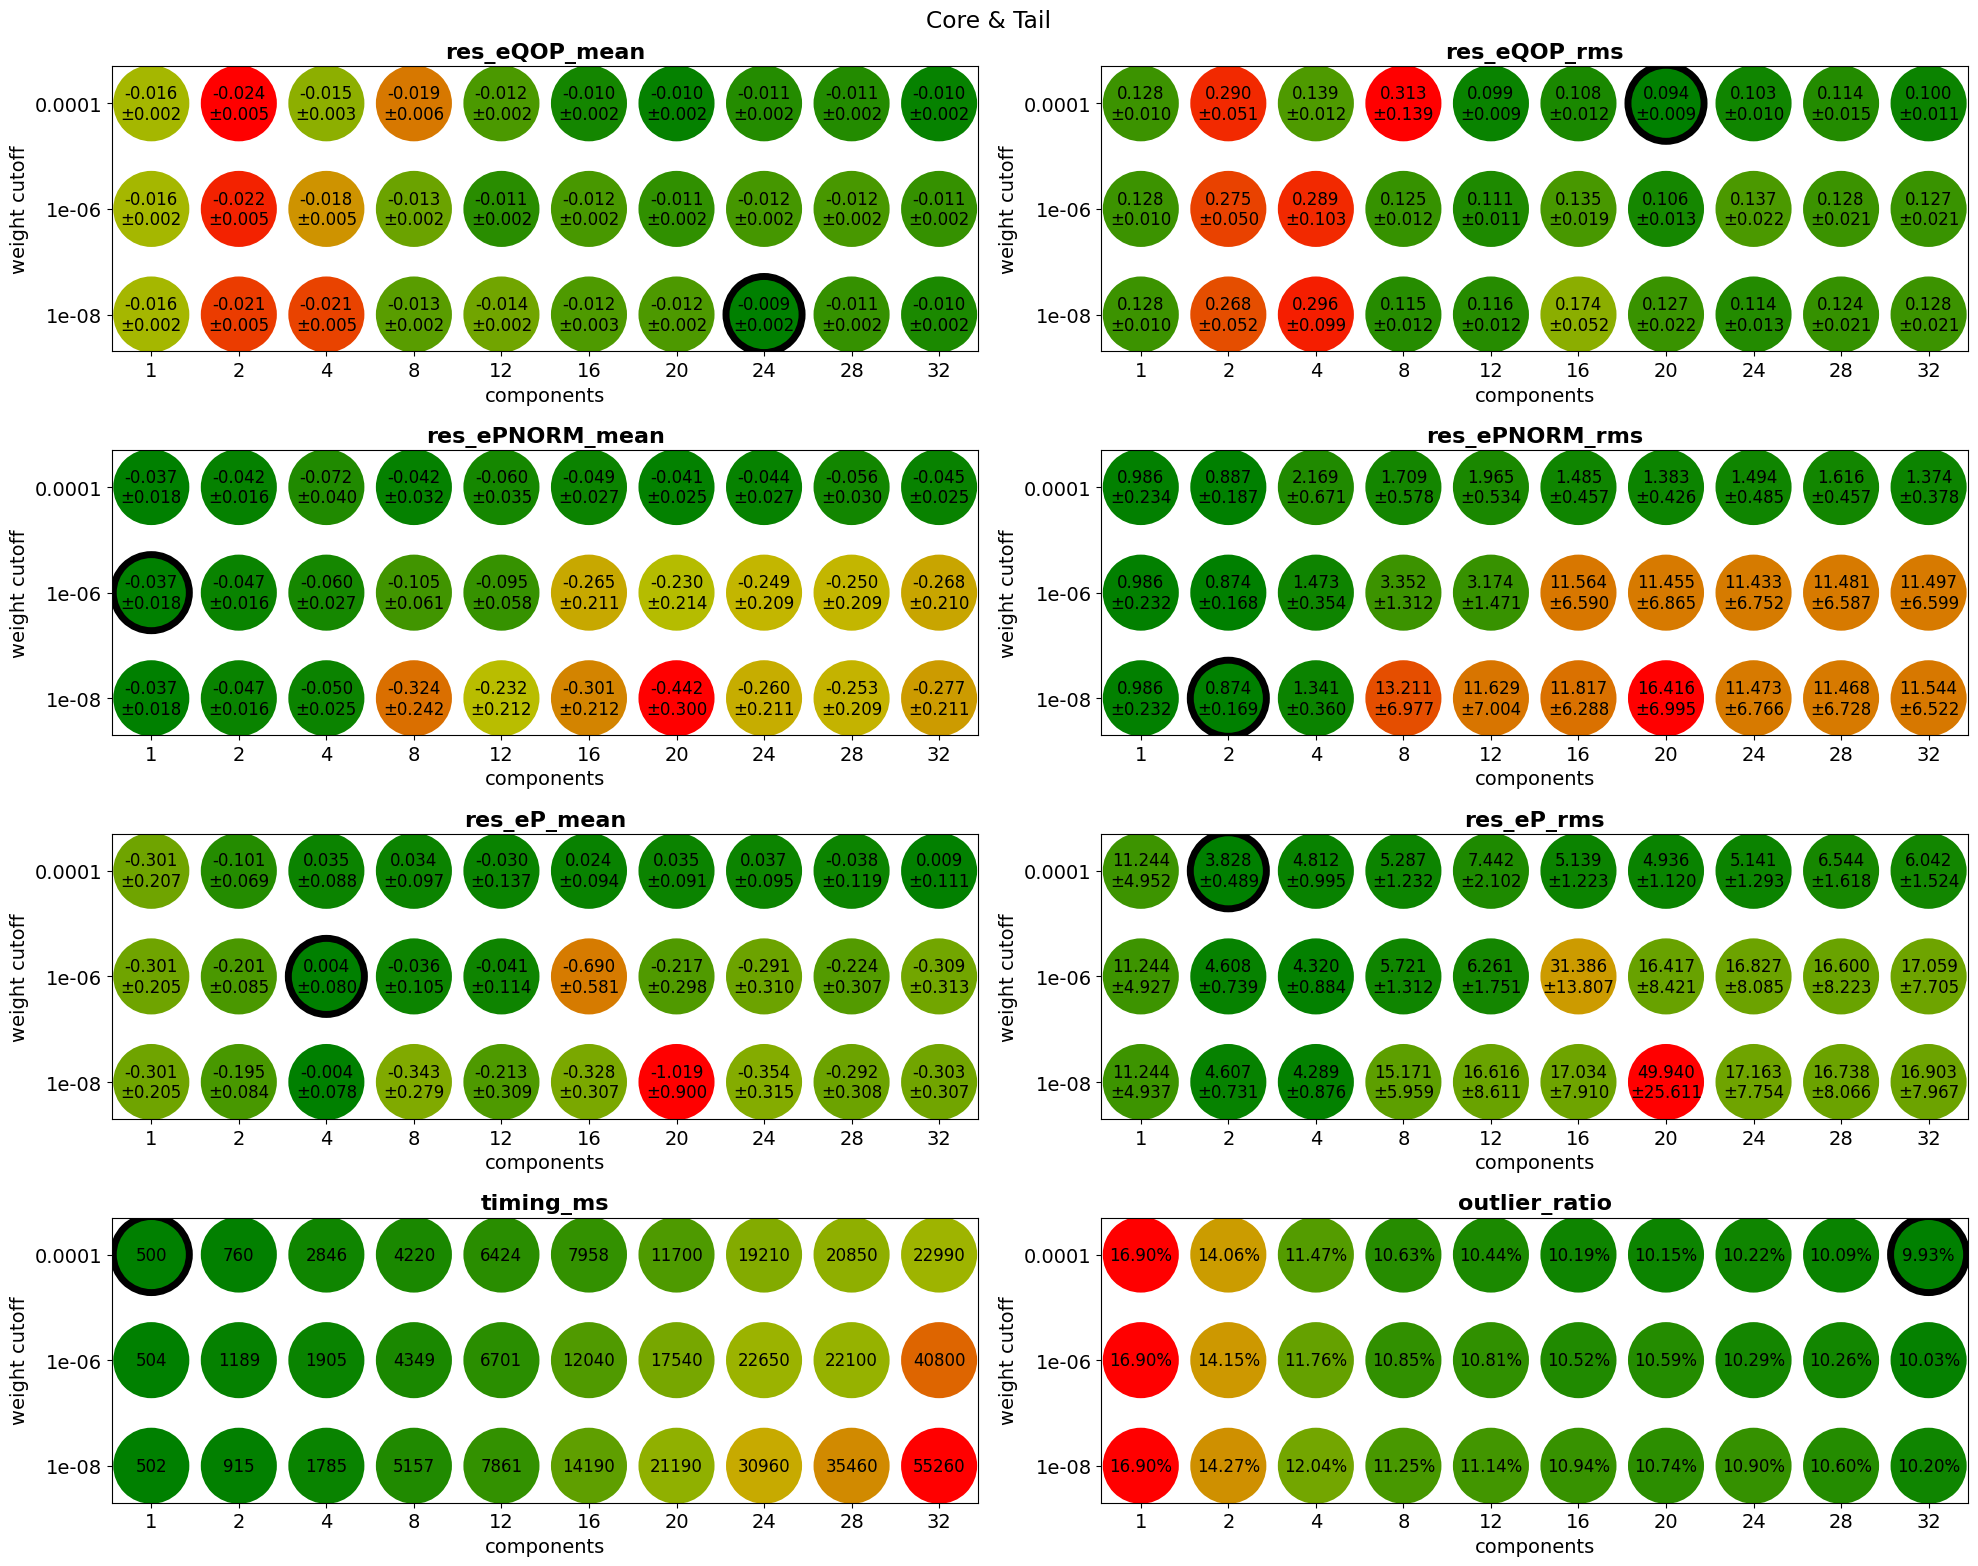

In [12]:
key_selection = [
    "res_eQOP_mean", "res_eQOP_rms", 
    #"res_eLOC0_mean", "res_eLOC0_rms", 
    #"pull_eQOP_mean","pull_eQOP_std", 
    "res_ePNORM_mean","res_ePNORM_rms", 
    "res_eP_mean","res_eP_rms", 
    "timing_ms", "outlier_ratio"
]

fig, axes = plt.subplots(4,2,figsize=(20,16))
axes = plot_key_selection(axes, key_selection)
fig.suptitle("Core & Tail")
fig.tight_layout()
fig.savefig(input_dir / "summary.png")

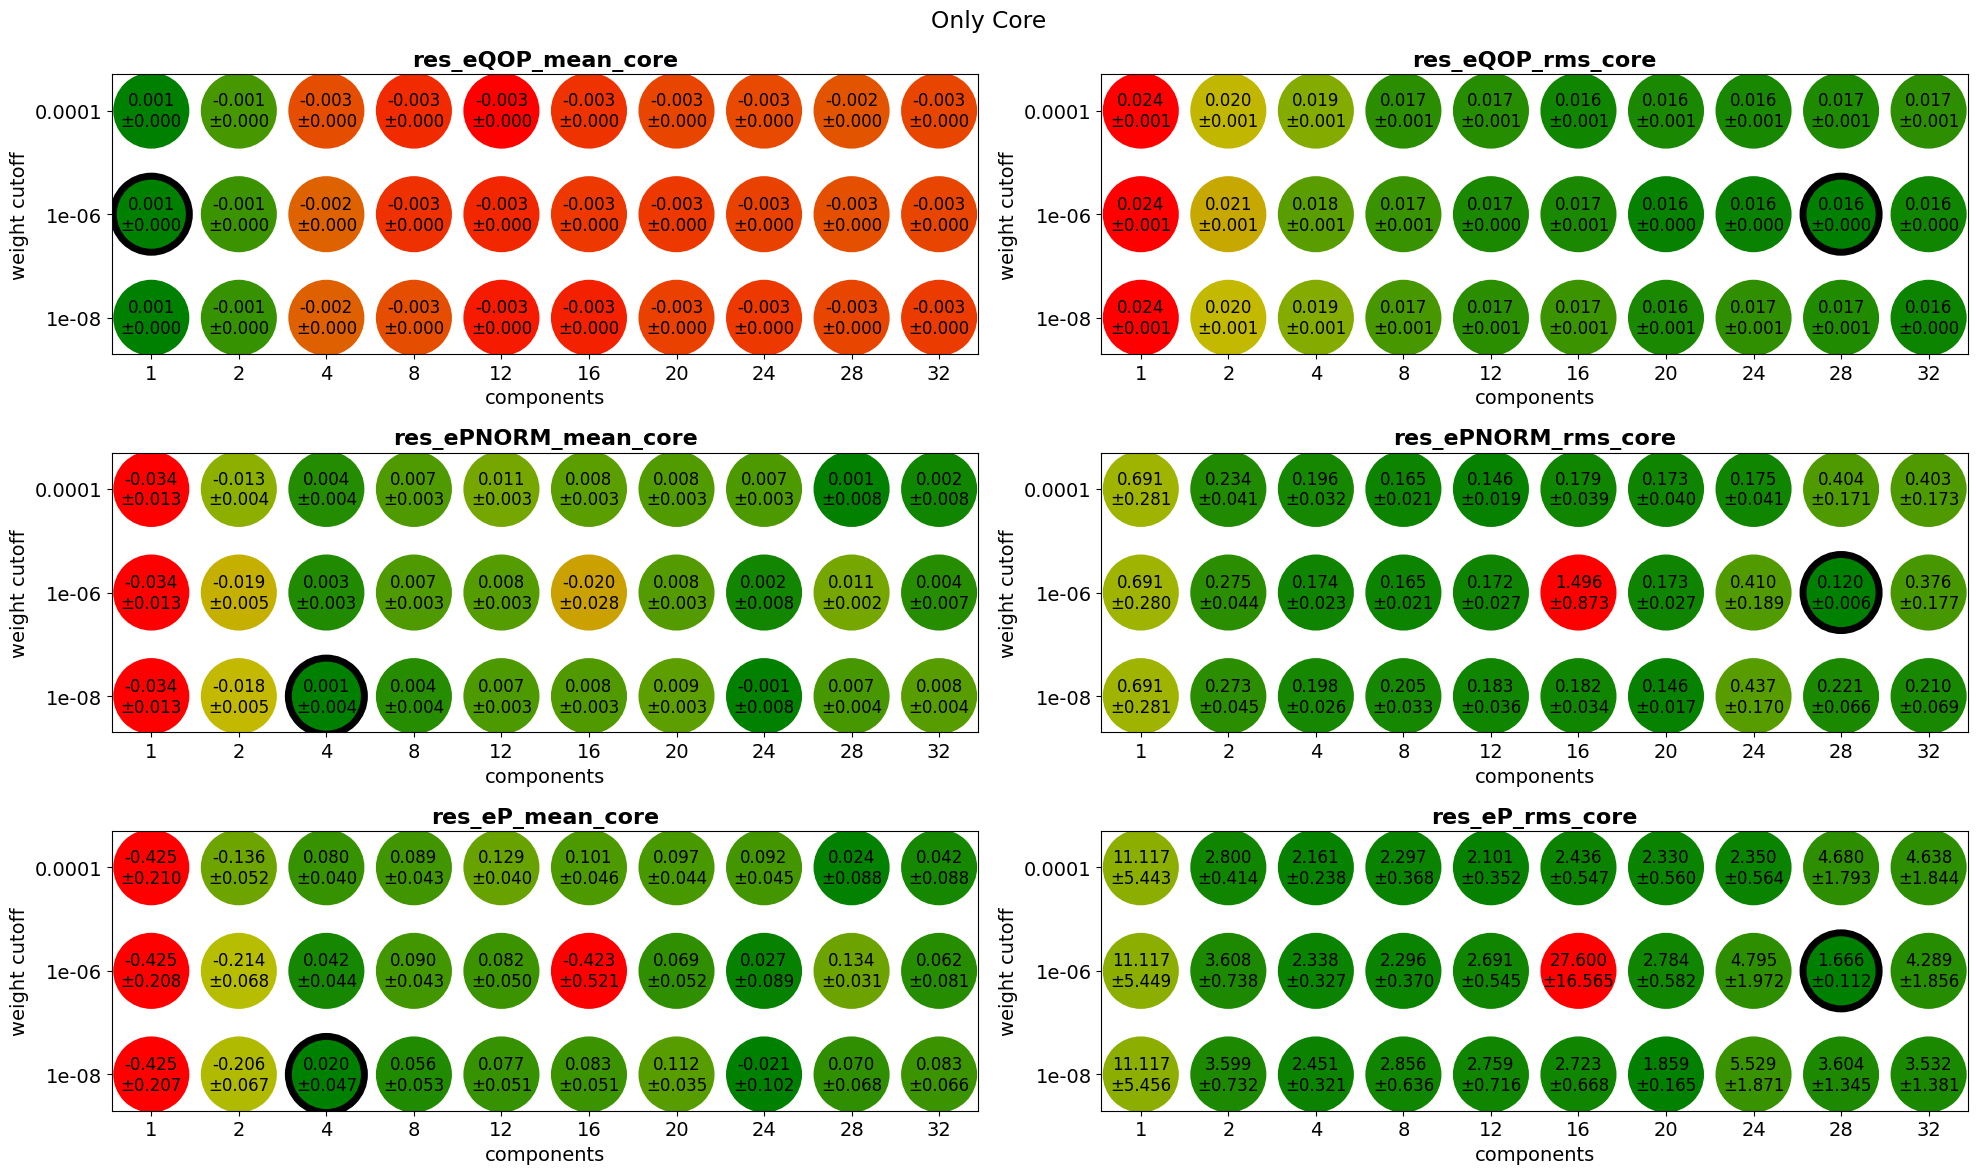

In [13]:
key_selection_core = [ key + "_core" for key in key_selection if "P" in key or "LOC0" in key ]

fig, axes = plt.subplots(3,2,figsize=(20,12))
plot_key_selection(axes, key_selection_core)
fig.suptitle("Only Core")
fig.tight_layout()
fig.savefig(input_dir / "summary_core.png")

In [14]:
from gsfanalysis.parallel_coordinates import parallel_coordinates

In [15]:
sweep_result_interesting = sweep_result[ (sweep_result["weight_cutoff"] == 1e-4) & (sweep_result["components"] > 4) ]
sweep_result_interesting = sweep_result_interesting.sort_values(by=["components"], ascending=False)

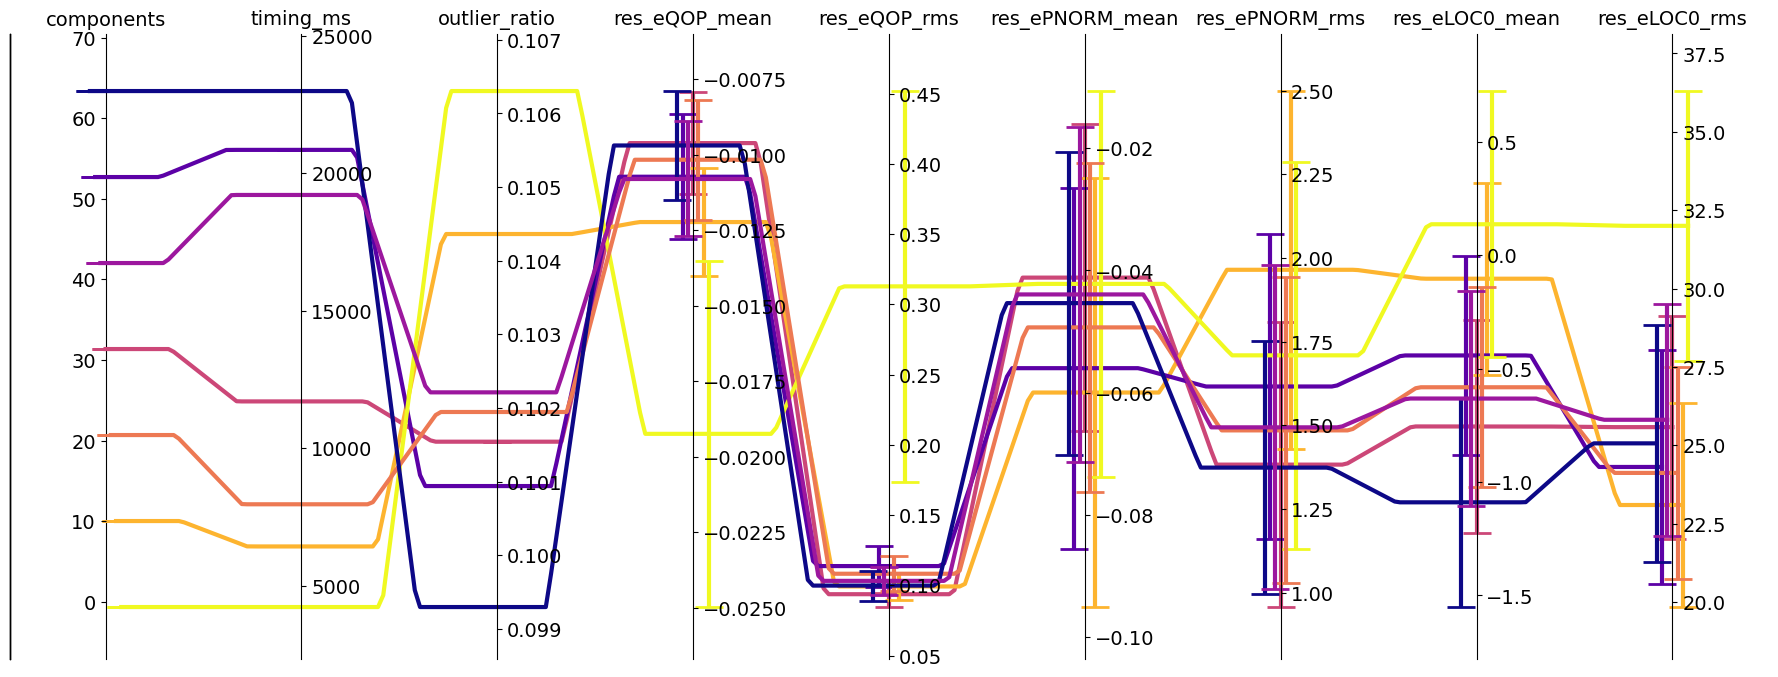

In [33]:
columns = ["components","timing_ms", "outlier_ratio", "res_eQOP_mean", "res_eQOP_rms", "res_ePNORM_mean", "res_ePNORM_rms","res_eLOC0_mean", "res_eLOC0_rms"]
error_columns = ["res_ePNORM_mean_err", "res_ePNORM_rms_err", "res_eLOC0_mean_err", "res_eLOC0_rms_err", "res_eQOP_mean_err", "res_eQOP_rms_err", ]

fig, ax = parallel_coordinates(
    sweep_result_interesting.loc[:, columns],
    sweep_result_interesting,
    "_err",
    jitter_x=True,
    log_columns=["weight_cutoff"],
    lw=3,
    cmap='plasma'
)

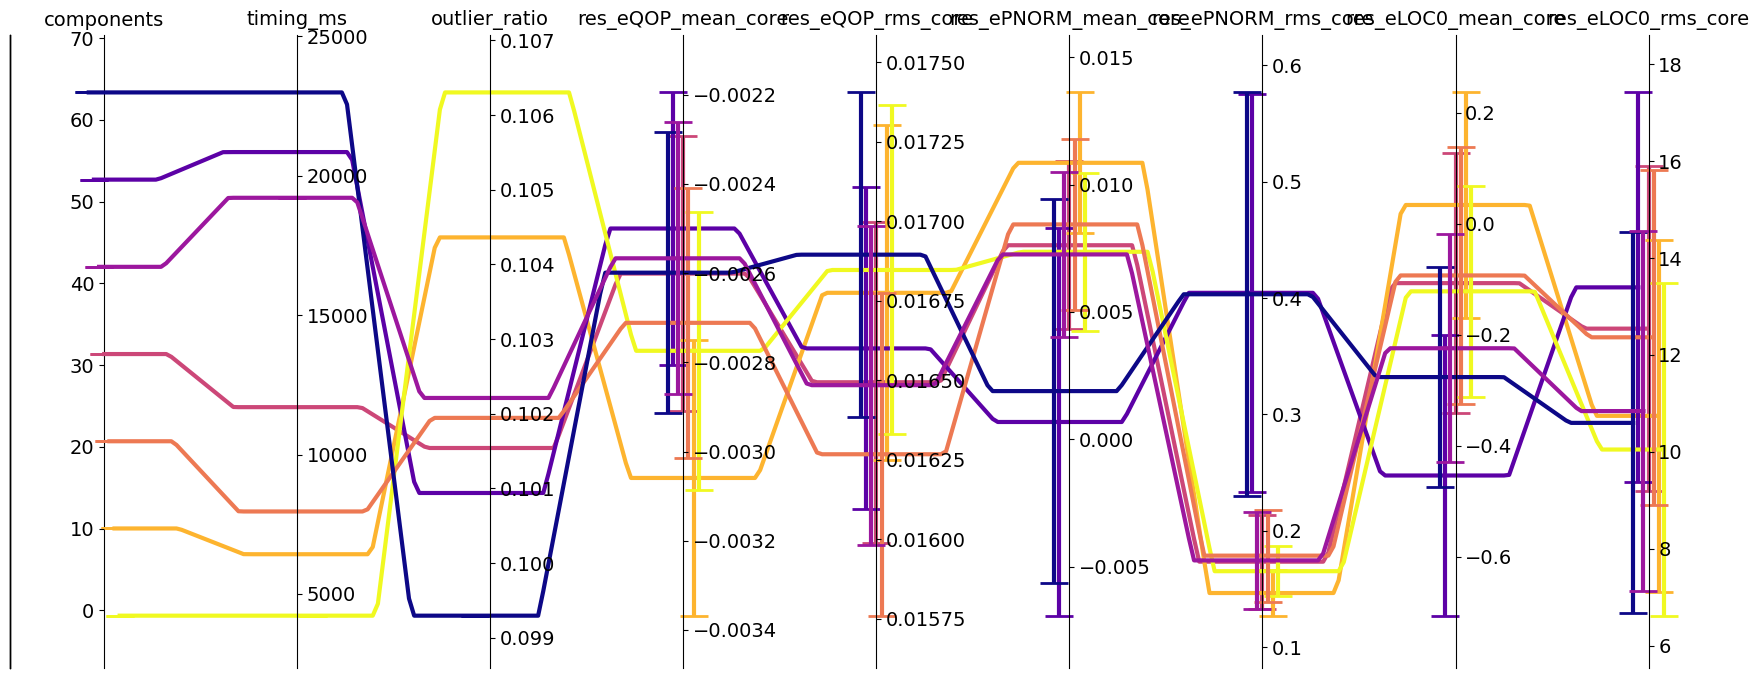

In [36]:
fig, ax = parallel_coordinates(
    sweep_result_interesting.loc[:, [c + "_core" if c + "_core" in sweep_result_interesting else c for c in columns]],
    sweep_result_interesting,
    "_err",
    jitter_x=True,
    log_columns=["weight_cutoff"],
    lw=3,
    cmap='plasma'
)